In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import sys

import os
import torch
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torch.utils.data.dataloader import DataLoader

# **Part 1**

In [ ]:
data = datasets.FashionMNIST('data/', train=True, download=True).data.numpy().astype(float)
X_train = data[:1000]
X_test = data[1000:4000]

**Flattening the 28*28 images**

In [3]:
X_train = X_train.reshape(1000,28*28)
X_test = X_test.reshape(3000,28*28)

**Normalizing the input images**

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**The weight matrix will be as follows: Number of rows = Number of neurons =  15$*$15 and Number of columns = Number of inputs = 28*28)**

**In step 3, when calculating the D(j), the minimum amount among the calculated D(j)s depends on how neurons are arranged and which input vector member is subtract and reaches power 2. So at this step arrangement of neurons is important, and as the third step affects the fourth step, it is also important.**

# **Part 2**

**Hyperparameters**

In [10]:
# Number of neurons
M = 225

# Dimension of the input patterns
N = X_train.shape[1]

# Total number of input patterns
P = X_train.shape[0]

learning_rate = 0.3

R = 1

MAX_EPOCHS = 100

MAX_WEIGHT_DIFF = 0.0001

DECAY_FACTOR = 0.0001

RADIUS_REDUCTION_STEP = 200

np.set_printoptions(threshold=sys.maxsize)

In [12]:
# Step 1: Initialization of each node’s weights with a random number between 0 and 1
initial_weight = np.random.rand(28*28*(15*15)).reshape(28*28, 15*15)

weight = np.copy(initial_weight)

last_weight = np.copy(weight)
weights_history =[]
weights_history.append(last_weight)
for epoch in range(MAX_EPOCHS):
    print("\r\nEpoch:", epoch)
    print("Learning rate:", np.around(learning_rate, 6))
    print("Neighborhood radius:", R)
    
    # Step 2: Choosing input patterns ordering
    # use normal ordering
    pattern_ordering = np.arange(P)

    progress = 0
    
    # For each input pattern do the steps 3-5
    for p in pattern_ordering:
        
        progress = progress + 1
        
        # Step 3: Calculating the Best Matching Unit (BMU)

        # initialize distance vector
        distance_vector = np.zeros(M)
    
        # calculate distance of each weight from each input pattern
        for j in range(M):
            for i in range(N):
                distance_vector[j] = distance_vector[j] + (weight[i,j] - X_train[p,i])**2

        # Step 4: find index j such that distance_vector[j] is a minimum
        min_distance_index = np.argmin(distance_vector)
        
        # Step 5: Update weights for all units j within a specified neighberhood of min_distance_index and for all i
        # calculate neighborhood borders
        begin_j = min_distance_index - R
        if (begin_j < 0):
            begin_j = 0
        
        end_j = min_distance_index + R
        if (end_j > M - 1):
            end_j = M - 1
        
        for j in range(begin_j, end_j + 1):
            for i in range(N):
                weight[i,j] = weight[i,j] + learning_rate * (X_train[p,i] - weight[i,j])

    # Step 6: Update learning rate
    learning_rate = DECAY_FACTOR * learning_rate
        
    # Step 8: Test stopping condition
    weight_diff = np.amax(np.abs(weight - last_weight))
    
    if (weight_diff < MAX_WEIGHT_DIFF):
        print("Weight change:", weight_diff, "<", MAX_WEIGHT_DIFF)
        print("Stopping condition is satisfied!")
        break
    else:
        print("Weight change:", weight_diff, ">", MAX_WEIGHT_DIFF)
    
    last_weight = np.copy(weight)
    weights_history.append(last_weight)


Epoch: 0
Learning rate: 0.3
Neighborhood radius: 1
Weight change: 0.9999943949405043 > 0.0001

Epoch: 1
Learning rate: 3e-05
Neighborhood radius: 1
Weight change: 0.0016355817704544195 > 0.0001

Epoch: 2
Learning rate: 0.0
Neighborhood radius: 1
Weight change: 1.6316137574357015e-07 < 0.0001
Stopping condition is satisfied!


**Weights**

In [48]:
weight[0]

array([2.69034232e-05, 8.76573213e-08, 2.04149310e-08, 1.75364915e-12,
       3.48122580e-15, 7.59254194e-21, 8.89470281e-27, 1.99780236e-33,
       4.20140646e-37, 3.22327826e-39, 1.91143969e-35, 9.27454509e-35,
       7.35528536e-33, 1.72296322e-29, 3.34215150e-25, 6.83278533e-22,
       4.86521139e-20, 1.69647982e-17, 4.35043613e-17, 4.87453120e-15,
       4.19717197e-13, 1.92499188e-09, 8.97701295e-07, 3.24421126e-05,
       1.70746621e-02, 4.28283924e-01, 1.26779051e-01, 5.18632369e-01,
       3.43066137e-01, 8.27668716e-01, 2.68880839e-01, 8.83260047e-02,
       2.25624361e-01, 9.54098810e-01, 8.24666678e-01, 2.05288537e-01,
       5.21520769e-02, 6.08609934e-01, 7.29437684e-01, 2.75878634e-01,
       8.67155349e-01, 4.11347365e-01, 8.83373145e-02, 2.21612589e-01,
       2.99555438e-01, 3.14222163e-01, 8.58260922e-01, 3.68934098e-01,
       6.99548156e-01, 1.99276481e-01, 7.21131795e-01, 8.85763640e-01,
       9.42911130e-01, 7.62297469e-01, 3.30483585e-01, 9.20935407e-02,
      

In [13]:
patterns_with_clusters = np.zeros((P, 2), dtype=int)

for p in range(1000):

    distance_vector = np.zeros(M)

    # calculate distance of each weight from each input pattern
    for j in range(M):
        for i in range(N):
            distance_vector[j] = distance_vector[j] + (weight[i,j] - X_test[p,i])**2

    # find index j such that distance_vector[j] is a minimum
    min_distance_index = np.argmin(distance_vector)
    
    # store pattern index 
    patterns_with_clusters[p,0] = p
    # store cluster number associated with pattern 
    patterns_with_clusters[p,1] = min_distance_index

In [38]:
# make an array of clusters size
clusters_size = [0 for j in range(M)]
clusters_members = [[] for j in range(M)]
for p in range(1000):
    # increment cluster size by 1
    clusters_size[patterns_with_clusters[p,1].astype(int)] = clusters_size[patterns_with_clusters[p,1].astype(int)] + 1

# **Part2-Optional-1**

**Given the diagram of 25 neurons have more than one class.**

<BarContainer object of 225 artists>

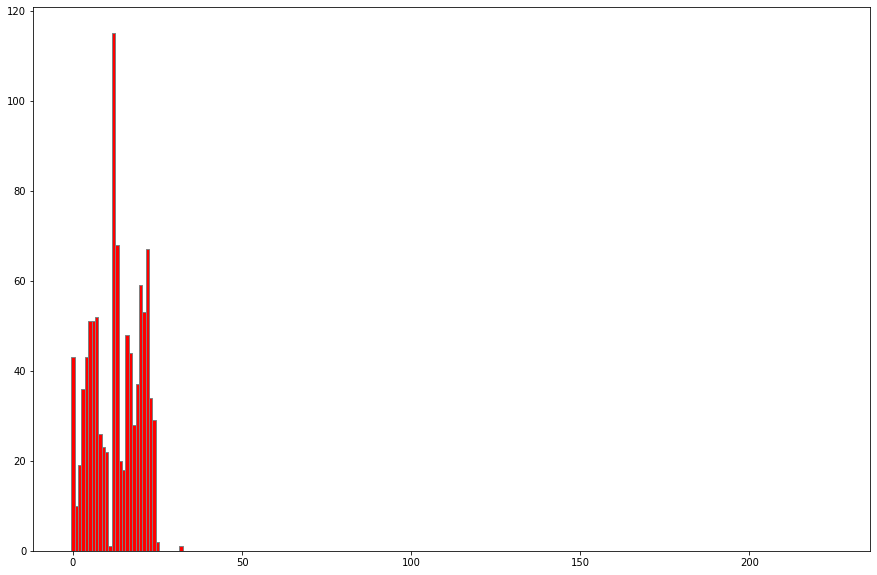

In [42]:
import seaborn as sns
clusters = np.asarray(clusters_size)
# Set position of bar on X axis
br1 = np.arange(len(clusters))
 
# Make the plot
plt.figure(figsize=(15,10))
plt.bar(br1, clusters, color ='r', width = 1,
        edgecolor ='grey', label ='IT')

# **Part2-Optional-2**
**The weight matrix will be as follows: Number of rows = Number of neurons =  15$*$15 and Number of columns = Number of inputs = 28*28) and Network performance will be weak given that R = 0.**



# **Part 3**

**Hyperparameters**

In [5]:
# Number of neurons
M = 225

# Dimension of the input patterns
N = X_train.shape[1]

# Total number of input patterns
P = X_train.shape[0]

learning_rate = 0.3

R = 3

MAX_EPOCHS = 100

MAX_WEIGHT_DIFF = 0.0001

DECAY_FACTOR = 0.0001

RADIUS_REDUCTION_STEP = 200

np.set_printoptions(threshold=sys.maxsize)

In [6]:
initial_weight = np.random.rand(28*28*(15*15)).reshape(28*28, 15*15)

# Step 1: Initialization of each node’s weights with a random number between 0 and 1
weight = np.copy(initial_weight)
#print("Initial weights:")
#print(np.around(weight, 2))

last_weight = np.copy(weight)
weights_history =[]
weights_history.append(last_weight)
for epoch in range(MAX_EPOCHS):
    print("\r\nEpoch:", epoch)
    print("Learning rate:", np.around(learning_rate, 6))
    print("Neighborhood radius:", R)
    
    # Step 2: Choosing input patterns ordering
    # use normal ordering
    pattern_ordering = np.arange(P)
    # use random ordering
    #np.random.shuffle(pattern_ordering)
    #print("Random input patterns ordering:", pattern_ordering)
    
    progress = 0
    
    # For each input pattern do the steps 3-5
    for p in pattern_ordering:
        
        progress = progress + 1
        
        #print("\r\n\tCurrent pattern index is", p, "and", np.around(progress/P*100, 2), "% of patterns has been processed in Epoch", epoch)
        
        # Step 3: Calculating the Best Matching Unit (BMU)

        # initialize distance vector
        distance_vector = np.zeros(M)
    
        # calculate distance of each weight from each input pattern
        for j in range(M):
            for i in range(N):
                distance_vector[j] = distance_vector[j] + (weight[i,j] - X_train[p,i])**2
                
        #print("\tdistance_vector", np.around(distance_vector, 2))

        # Step 4: find index j such that distance_vector[j] is a minimum
        min_distance_index = np.argmin(distance_vector)
        
        #print("\tmin_distance_index", min_distance_index)
        
        # Step 5: Update weights for all units j within a specified neighberhood of min_distance_index and for all i
        # calculate neighborhood borders
        begin_j = min_distance_index - R
        if (begin_j < 0):
            begin_j = 0
        
        end_j = min_distance_index + R
        if (end_j > M - 1):
            end_j = M - 1
            
        #print("neighberhood", begin_j, end_j)
        
        for j in range(begin_j, end_j + 1):
            for i in range(N):
                weight[i,j] = weight[i,j] + learning_rate * (X_train[p,i] - weight[i,j])

    # Step 6: Update learning rate
    learning_rate = DECAY_FACTOR * learning_rate

    # Step 7: Reduce radius of topological neighborhood at specified times
    if R > 0 :
            R = R - 1
        
    # Step 8: Test stopping condition
    weight_diff = np.amax(np.abs(weight - last_weight))
    
    if (weight_diff < MAX_WEIGHT_DIFF):
        print("Weight change:", weight_diff, "<", MAX_WEIGHT_DIFF)
        print("Stopping condition is satisfied!")
        break
    else:
        print("Weight change:", weight_diff, ">", MAX_WEIGHT_DIFF)
    
    last_weight = np.copy(weight)
    weights_history.append(last_weight)


Epoch: 0
Learning rate: 0.3
Neighborhood radius: 3
Weight change: 0.9998354951980238 > 0.0001

Epoch: 1
Learning rate: 3e-05
Neighborhood radius: 2
Weight change: 0.0025957416211894735 > 0.0001

Epoch: 2
Learning rate: 0.0
Neighborhood radius: 1
Weight change: 1.9475723433970415e-07 < 0.0001
Stopping condition is satisfied!


In [7]:
patterns_with_clusters = np.zeros((P, 2), dtype=int)

for p in range(1000):

    distance_vector = np.zeros(M)

    # calculate distance of each weight from each input pattern
    for j in range(M):
        for i in range(N):
            distance_vector[j] = distance_vector[j] + (weight[i,j] - X_test[p,i])**2

    # find index j such that distance_vector[j] is a minimum
    min_distance_index = np.argmin(distance_vector)
    
    # store pattern index 
    patterns_with_clusters[p,0] = p
    # store cluster number associated with pattern 
    patterns_with_clusters[p,1] = min_distance_index

In [8]:
# make an array of clusters size
clusters_size = [0 for j in range(M)]
clusters_members = [[] for j in range(M)]
for p in range(1000):
    # increment cluster size by 1
    clusters_size[patterns_with_clusters[p,1].astype(int)] = clusters_size[patterns_with_clusters[p,1].astype(int)] + 1

# **Part 3-Optional**

<BarContainer object of 225 artists>

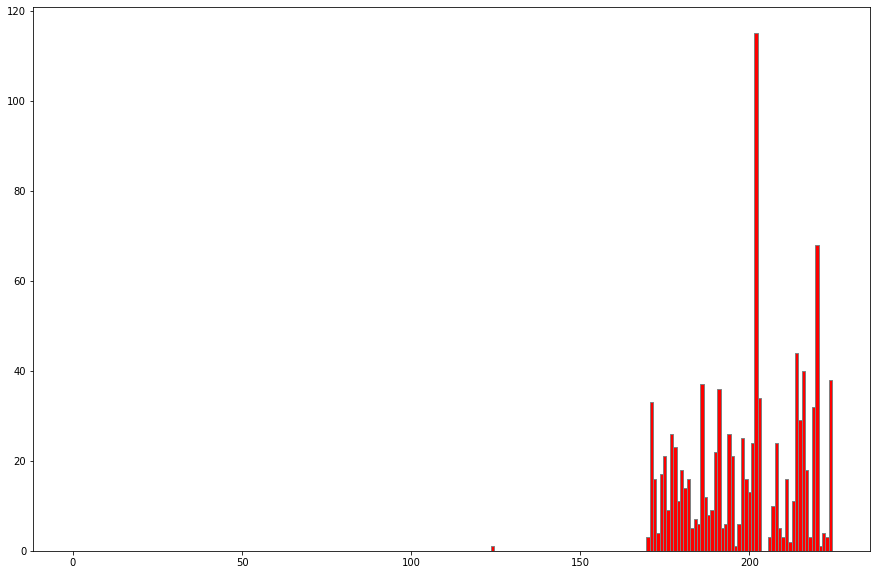

In [9]:
import seaborn as sns
clusters = np.asarray(clusters_size)
# Set position of bar on X axis
br1 = np.arange(len(clusters))

# Make the plot
plt.figure(figsize=(15,10))
plt.bar(br1, clusters, color ='r', width = 1,
        edgecolor ='grey', label ='IT')

# **Part 4**

**Yes the recovery has been achieved. As we can see, it is more suitable than part b, the number of the classes to neurons, and the number of neurons that has been mapped to more than one class has decreased.**

**When we use variable neighborhood radius, our calculations for a neuron such as X are compared to all neurons, not just its neighbors, and therefore we get a desirable result.**